RMSE: 281802006037.4133
R-squared (R2) Score: -7.65094923724772e+22


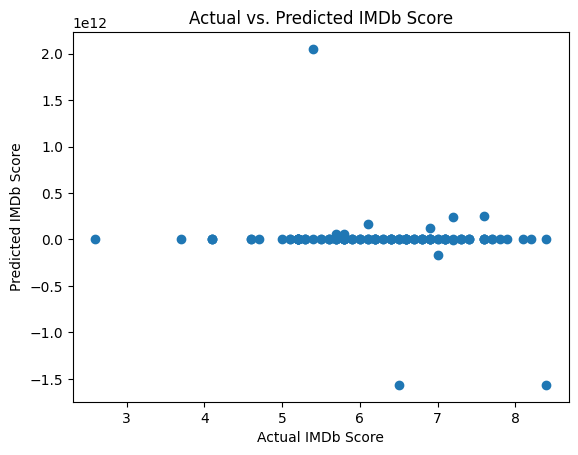

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of encodings to try
encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']

# Initialize data as None
data = None

# Try each encoding until successful
for encoding in encodings_to_try:
    try:
        data = pd.read_csv('NetflixOriginals.csv', encoding=encoding)
        break  # Exit the loop if successful
    except UnicodeDecodeError:
        continue

if data is not None:
    # Feature Engineering
    # Encoding Categorical Features
    data = pd.get_dummies(data, columns=['Genre', 'Language'], prefix=['Genre', 'Language'])

    # Convert Premiere to datetime and extract year
    data['Premiere'] = pd.to_datetime(data['Premiere'])
    data['PremiereYear'] = data['Premiere'].dt.year

    # Drop unnecessary columns
    data = data.drop(['Title', 'Premiere', 'Runtime'], axis=1)

    # Model Training
    # Split the data into features (X) and target (y)
    X = data.drop(['IMDB Score'], axis=1)
    y = data['IMDB Score']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Model Evaluation
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"RMSE: {rmse}")
    print(f"R-squared (R2) Score: {r2}")

    # Visualize the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual IMDb Score')
    plt.ylabel('Predicted IMDb Score')
    plt.title('Actual vs. Predicted IMDb Score')
    plt.show()
else:
    print("None of the encodings worked. Please check the file's encoding.")
